In [32]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [33]:
#numerical parameters
dz = 0.01
g = 1
pi = 3.14159
a = 1/(5*dz) #fitting parameter for galerkin functions
tilt_angle = pi/4
alpha = tilt_angle

#grid
z = np.arange(0,1+dz,dz)
N = z.shape[0]
z = z.reshape((N,1))


In [34]:
#velocity profiles:
noise_param = 0.1
u = 2*(g*np.sin(alpha))**0.5*(1-np.sqrt(np.abs(1-z))**(3))/3 + noise_param*np.random.randn(N,1)**2
u_true = 2*(g*np.sin(alpha))**0.5*(1-np.sqrt(np.abs(1-z))**(3))/3 
dudz = (g*np.sin(alpha))**0.5*(1-z)**0.5  + gaussian_filter(noise_param*np.random.randn(N,1),sigma=5)
dudz_true = (g*np.sin(alpha))**0.5*(1-z)**0.5 
d2udz2 = -0.5*(g*np.sin(alpha))**0.5*(1-z)**(-0.5) + noise_param*np.random.randn(N,1)
d2udz2[-1,0] = -1000
#plt.figure(figsize=(8,8))
#plt.plot(z,u_true,'k')
#plt.plot(z,u,'.')
#plt.xlabel('$z$')
#plt.ylabel('velocity, $u$')

<ipython-input-34-8a98da2ca9e3>:7: RuntimeWarning: divide by zero encountered in power
  d2udz2 = -0.5*(g*np.sin(alpha))**0.5*(1-z)**(-0.5) + noise_param*np.random.randn(N,1)


<ipython-input-35-313795175413>:6: RuntimeWarning: divide by zero encountered in power
  d2udz2 = -0.5*(g*np.sin(alpha))**0.5*(1-z)**(-0.5) + noise_param*np.random.randn(N,1)


Text(0, 0.5, 'Velocity Shear, $u_z$')

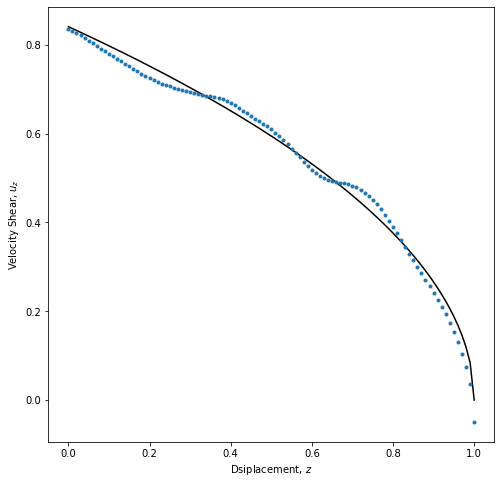

In [35]:
#velocity profiles:
noise_param = 0.1
u = 2*(g*np.sin(alpha))**0.5*(1-np.sqrt(np.abs(1-z))**(3))/3 + noise_param*np.random.randn(N,1)**2
dudz = (g*np.sin(alpha))**0.5*(1-z)**0.5  + gaussian_filter(noise_param*np.random.randn(N,1),sigma=5)
dudz_true = (g*np.sin(alpha))**0.5*(1-z)**0.5 
d2udz2 = -0.5*(g*np.sin(alpha))**0.5*(1-z)**(-0.5) + noise_param*np.random.randn(N,1)
d2udz2[-1,0] = -1000
#analytically inferring mu:

mu_analytical = g*np.sin(alpha)*(1-z)/dudz
#print(mu_analytical)
#print(dudz)
plt.figure(figsize=(8,8))
plt.plot(z,dudz_true,'k')
plt.plot(z,dudz,'.')
plt.xlabel('Dsiplacement, $z$')
plt.ylabel('Velocity Shear, $u_z$')


Text(0, 0.5, 'Viscosity $\\mu(u_z)$')

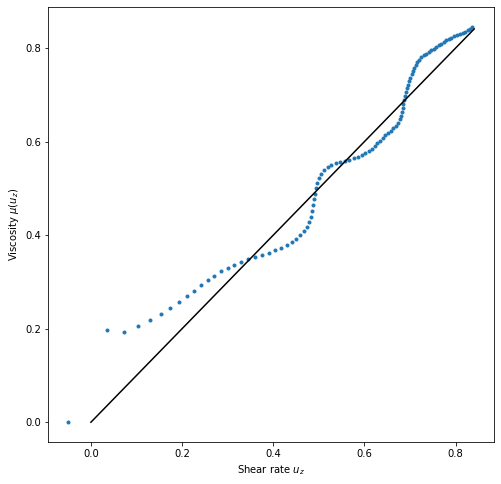

In [36]:
plt.figure(figsize=(8,8))
plt.plot(dudz,mu_analytical,'.')
plt.plot(dudz_true,dudz_true,'k')
plt.xlabel('Shear rate $ u_z$')
plt.ylabel('Viscosity $\mu(u_z)$')

Text(0, 0.5, '$\\mu(z)$')

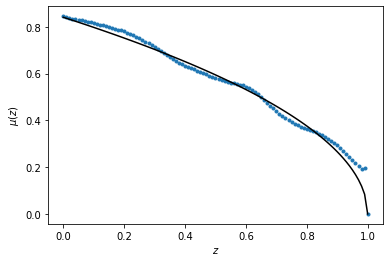

In [37]:
plt.plot(z,mu_analytical,'.')
plt.plot(z,dudz_true,'k')
plt.xlabel('$z$')
plt.ylabel('$\mu(z)$')

In [38]:
def phi(x_i,x_j,a):
    eps = 1e-6
    r = np.abs(x_i-x_j)
    
    return np.exp(-(a*r)**2)

In [39]:
def dphidx(x_i,x_j,a):
    r = np.abs(x_i-x_j)
    return -2*a**2*(x_i-x_j)*np.exp(-(a*r)**2)


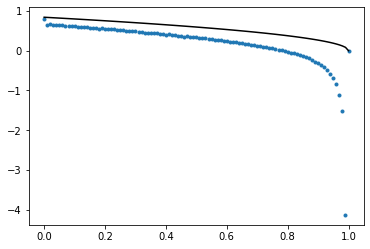

In [40]:
#building solver matrix:

A = np.zeros((N,N))
sol_mat = np.zeros((N,1))
for i in range(0,N):
    for j in range(0,N):
        A[i,j] = phi(z[i,0],z[j,0],a)*d2udz2[i,0] + dphidx(z[i,0],z[j,0],a)*dudz[i,0]

    sol_mat[i,0] = -g*np.sin(alpha)

#boundary condition:
A[N-1,:] = 0
sol_mat[N-1,:] = 0
for j in range(0,N):
    A[N-1,j] = phi(z[N-1,0],z[j,0],a)

mu_j = np.linalg.solve(A,sol_mat)

phi_mat = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        phi_mat[i,j] = phi(z[i,0],z[j,0],a)

mu_est = np.matmul(phi_mat,mu_j)
plt.plot(z,mu_est,'.')
plt.plot(z,dudz_true,'k')

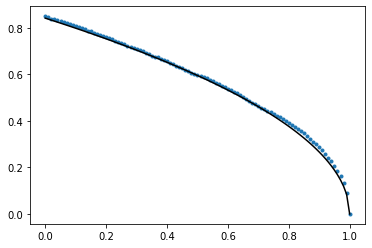

In [41]:
#solving via finite difference:

mu_fd = np.zeros((N,1))
for j in range(0,N-1):
    i = N-j-1
    mu_fd[i-1,0] = (-g*np.sin(alpha)-mu_fd[i,0]*dudz[i-1,0]/dz)/(d2udz2[i-1,0]-dudz[i-1,0]/dz)

plt.plot(z,mu_fd,'.')
plt.plot(z,dudz_true,'k')